# EDA
Given that our data has been precompiled and cleaned, it is an excellent candidate for EDA!


In [1]:
# Set Up
import pandas as pd
import numpy as np

# Graphing
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,10)
import seaborn as sns
import plotly.express as px

# These lines make warnings look nicer
import warnings
warnings.simplefilter('ignore', FutureWarning)


# Loading Data
The following data comes from the 2010 US Census and contains n = 236,459 entries each representing homosexual married couples with the following attributes:
* _at least_ two children
* a father who has worked in the previous year
* a mother between 21 and 35

In [2]:
sample = pd.read_csv('../data/sample.csv')
sample.head()

,KIDCOUNT,boy1st,boy2nd,boys2,girls2,samesex,morekids,blackm,hispm,whitem,...,agem,aged,weeksm,weeksd,wagem,waged,expm,expd,st,rv
0,2,1,0,0,0,0,0,0,0,1,...,27,35,0,16,NaN,72.078303,9,17,63,0.432150
1,2,0,1,0,0,0,0,0,0,1,...,30,28,30,32,25.954494,26.818263,17,13,63,0.378113
2,2,1,0,0,0,0,0,0,0,1,...,27,30,0,52,NaN,24.285571,9,11,63,0.867049
3,2,1,0,0,0,0,0,1,0,0,...,35,36,0,52,NaN,35.210337,15,11,63,0.046637
4,2,0,0,0,1,1,0,0,0,1,...,30,34,22,40,15.608967,18.148450,10,10,63,0.053762


In [3]:
sample.columns.to_list()

['KIDCOUNT',
 'boy1st',
 'boy2nd',
 'boys2',
 'girls2',
 'samesex',
 'morekids',
 'blackm',
 'hispm',
 'whitem',
 'othracem',
 'blackd',
 'hispd',
 'whited',
 'othraced',
 'educm',
 'educd',
 'agefstm',
 'agefstd',
 'workedm',
 'workedd',
 'hrsweekd',
 'hrsweekm',
 'annhrsm',
 'annhrsd',
 'wnhm',
 'wnhd',
 'earningsm',
 'earningsd',
 'faminc',
 'famearn',
 'agem',
 'aged',
 'weeksm',
 'weeksd',
 'wagem',
 'waged',
 'expm',
 'expd',
 'st',
 'rv']

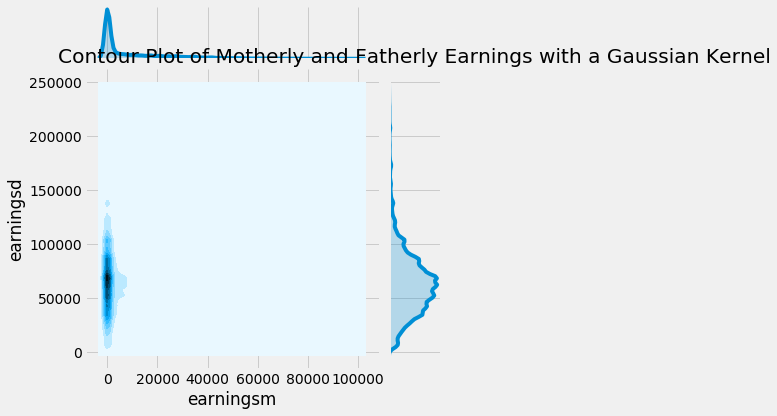

In [22]:
sns.jointplot(data = sample, x = 'earningsm', y = 'earningsd', kind = 'kde')
plt.title('Contour Plot of Motherly and Fatherly Earnings with a Gaussian Kernel');

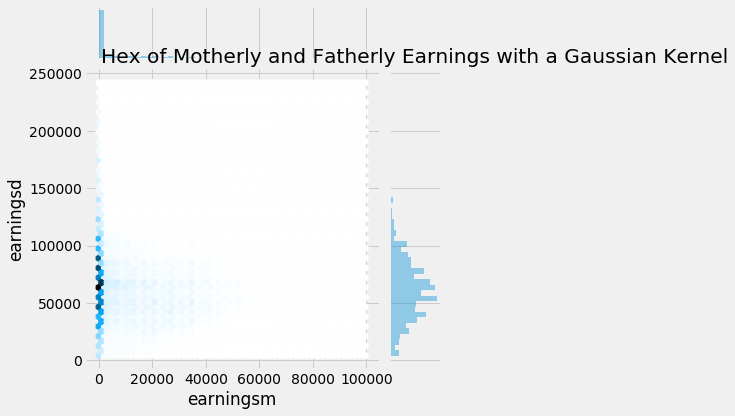

In [23]:
sns.jointplot(data = sample, x = 'earningsm', y = 'earningsd', kind = 'hex')
plt.title('Hex of Motherly and Fatherly Earnings with a Gaussian Kernel');


In [24]:
pd.Series(sample.columns[np.where(dummies!=0)[1]])

NameError: name 'dummies' is not defined

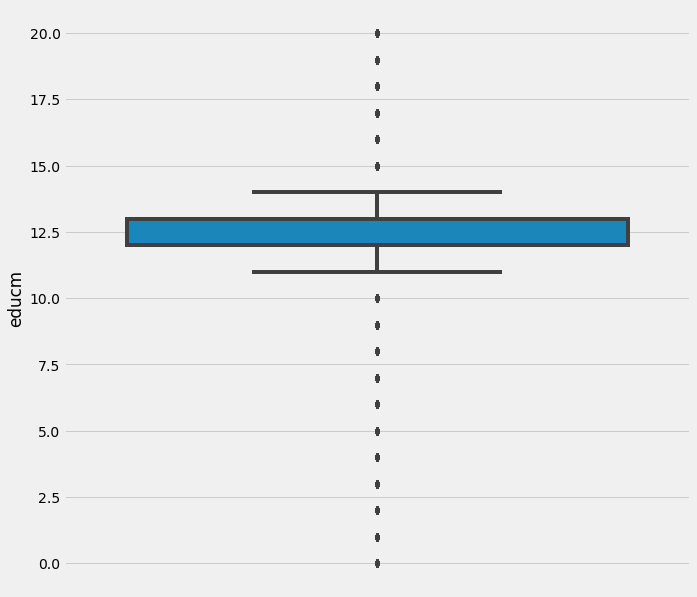

In [16]:

sns.boxplot(data=sample, y = 'educm')